In [6]:
import os;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import joblib

In [7]:
# Load the dataset
data = pd.read_csv('out/etl.csv', sep=";", decimal=",")

In [8]:
# Feature selection
features = data[[
	'Density_Target',
	'Dry_Feed_Rate_PID.SP',
	#'Dry_Feed_Rate_PID.PV',
	#'Line 1',
	#'Line 2',
	#'Line 3'
]]

# Target variable
target = data['Dry_Feed_Rate_PID.OUT']

# Data preprocessing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
#model = LinearRegression()
#model = GradientBoostingRegressor()
model = DecisionTreeRegressor()
#model = SVR()
#model = RandomForestRegressor()
#model = HistGradientBoostingRegressor()

model.fit(X_train, y_train)



DecisionTreeRegressor()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(f"Score: {score}")

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Score: 0.9702462909159362
Mean Squared Error (MSE): 4.090787729211781
Mean Absolute Error (MAE): 1.41575718687924
R-squared (R2): 0.9702462909159362


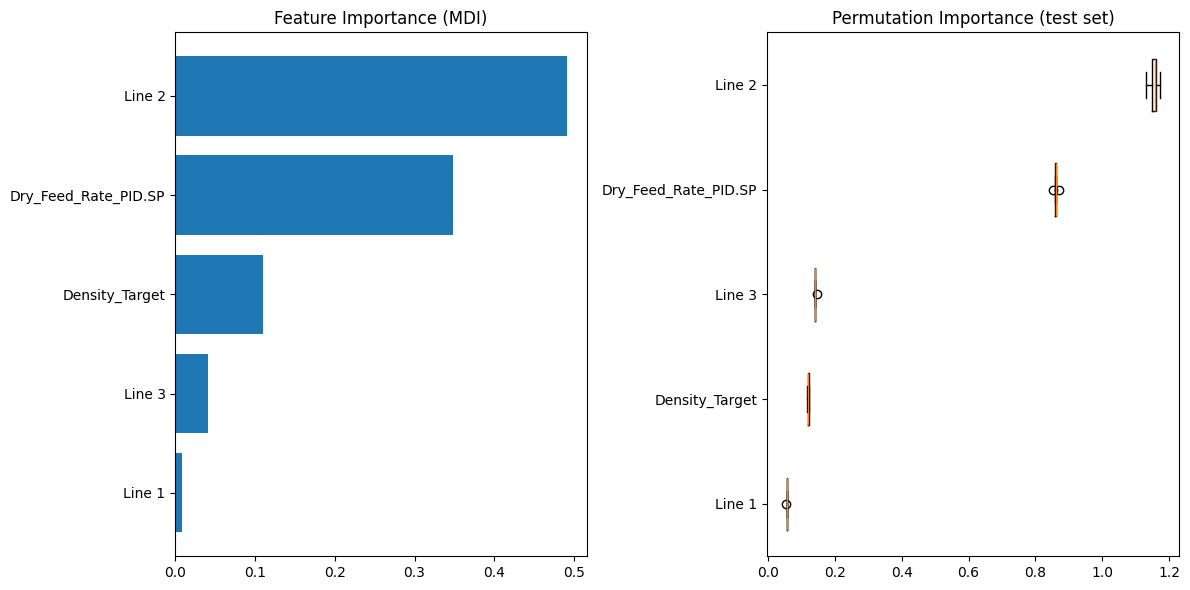

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, features.columns[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(model, X_test, y_test)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=features.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [11]:
if (os.path.exists("out") == False):
	os.mkdir("out")

joblib.dump(scaler, 'out/scaler.pkl')
joblib.dump(model, 'out/trained_model.pkl')

['out/trained_model.pkl']